In [4]:
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
import matplotlib
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
%matplotlib inline

# 1 Support Vector Machines
In the first half of this exercise, you will be using support vector machines
(SVMs) with various example 2D datasets. Experimenting with these datasets
will help you gain an intuition of how SVMs work and how to use a Gaussian
kernel with SVMs. In the next half of the exercise, you will be using support
vector machines to build a spam classifier.

## 1.1 Example Dataset 1

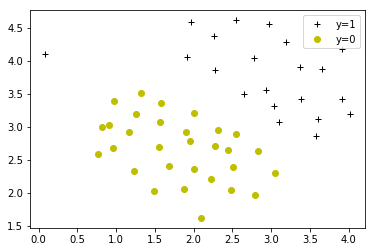

In [5]:
#Loading and Visualizing Data

#Load from ex6data1
dataFile='ex6data1.mat'
data=scio.loadmat(dataFile)
X=data['X']
y=data['y']

def plotData(X,y):
    pos=np.squeeze(y==1)
    neg=np.squeeze(y==0)
    plt.plot(X[pos][:,0],X[pos][:,1],'k+',label='y=1')
    plt.plot(X[neg][:,0],X[neg][:,1],'yo',label='y=0')
    plt.legend()

plotData(X,y)
plt.show()

Here I will use skearn.svm.SVC to compute the model,here's the introduction of this function:
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [6]:
#Training Linear SVM
#try when C=1
#model=SVC(C=C,kernel='linear') 生成的是一个对象，名字叫model，属于SVC类
#model=model.fit(X,y) 让该对象(SVM模型)拟合X，y得到训练后的模型
model=SVC(C=1,kernel='linear').fit(X,y)

/home/zhanghaoxu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


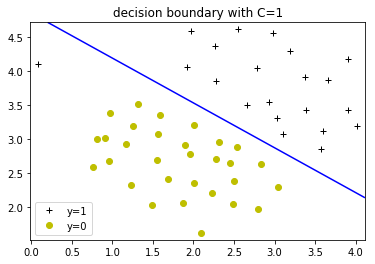

In [7]:
def visualizeBoundary(X,y,model):
    #plot the training data on top of boundary
    plotData(X,y)
    
    #Make classification predictions over a grid of values
    x1plot=np.linspace(np.min(X[:,0])-0.1,np.max(X[:,0])+0.1,100)
    x2plot=np.linspace(np.min(X[:,1])-0.1,np.max(X[:,1])+0.1,100)
    vals=np.zeros((x1plot.shape[0],x2plot.shape[0]))
    for i in range(x1plot.shape[0]):
        for j in range(x2plot.shape[0]):
            this_X=np.hstack((np.array([[x1plot[i]]]),np.array([[x2plot[j]]])))
            vals[i][j]=model.decision_function(this_X)
    X1,X2=np.meshgrid(x1plot,x2plot)
    vals=vals.T
    plt.contour(X1,X2,vals,np.array([0]),colors='b',label='decision boundary')
    plt.legend(loc='lower left')
visualizeBoundary(X,y,model)
plt.title('decision boundary with C=1')
plt.show()

/home/zhanghaoxu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


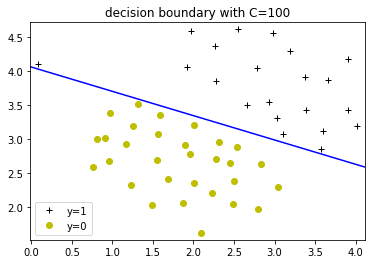

In [8]:
#try when C=100
model=SVC(C=100,kernel='linear').fit(X,y)
visualizeBoundary(X,y,model)
plt.title('decision boundary with C=100')
plt.show()

## 1.2 SVM with Gaussian Kernels

### 1.2.1 Gaussian Kernel

In [9]:
#Implementing Gaussian Kernel

def gaussianKernel(x1,x2,sigma):
    '''this function will return the similarity between x1 and x2 computed using 
    a Gaussian kernel with bandwidth sigma'''
    #Ensure that x1 and x2 are column vectors
    x1=x1.reshape(x1.shape[0],1)
    x2=x2.reshape(x2.shape[0],1)
    
    #compute the similarity
    sim=np.exp(-(np.linalg.norm(x1-x2,ord=2))**2/(2*(sigma**2)))
    return sim

#test gaussianKernel function
x1=np.array([1,2,1])
x2=np.array([0,4,-1])
sigma=2
sim=gaussianKernel(x1,x2,sigma)
print('Gaussian Kernel between x1=[1;2;1],x2=[0;4;-1],sigma=2,this value should be about \
0.324652,my value is ',sim)

Gaussian Kernel between x1=[1;2;1],x2=[0;4;-1],sigma=2,this value should be about 0.324652,my value is  0.324652467358


### 1.2.2 Example Dataset 2

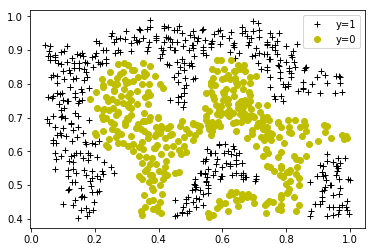

In [10]:
#Visualizing Dataset 2

#load the data
dataFile='ex6data2.mat'
data=scio.loadmat(dataFile)
X=data['X']
y=data['y']

#plot training data
plotData(X,y)
plt.show()

/home/zhanghaoxu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


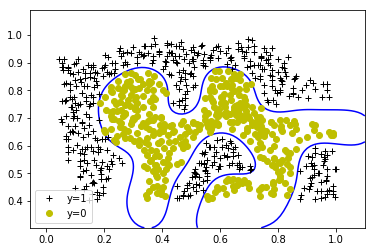

In [11]:
#Training SVM with RBF Kernel(Dataset 2)

#use 'rbf' kernel(equal to gaussian kernel)
C=1
sigma=0.1
#在SVC的参数中，有gamma的值，而gamma应当是等于1/sigma^2,所以gamma等于100
model=SVC(C=1,kernel='rbf',gamma=100)
model=model.fit(X,y)
visualizeBoundary(X,y,model)

### 1.2.3 Example Dataset 3

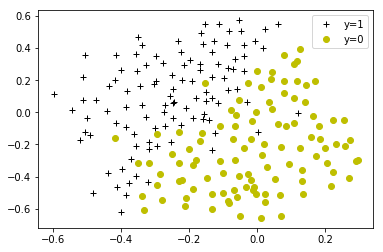

In [12]:
#Visualizing Dataset 3

#load data
dataFile='ex6data3.mat'
data=scio.loadmat(dataFile)
X=data['X']
y=data['y']
Xval=data['Xval']
yval=data['yval']
#plot data
plotData(X,y)

In [13]:
#Training SVM with RBF Kernel (Dataset 3)
def dataset3Params(X,y,Xval,yval):
    gamma_all=np.array([10000,3000,1000,300,100,30,10,3,1,0.3,0.1,0.03,0.01])
    C_all=np.array([0.01,0.03,0.1,0.3,1,3,10,30])
    accuracy=np.zeros((gamma_all.shape[0],C_all.shape[0]))
    for i in range(gamma_all.shape[0]):
        for j in range(C_all.shape[0]):
            model=SVC(C=C_all[j],kernel='rbf',gamma=gamma_all[i]).fit(X,y)
            accuracy[i][j]=model.score(Xval,yval)
    arg=np.argmax(accuracy)
    gamma_best=gamma_all[arg//accuracy.shape[1]]
    C_best=C_all[arg%accuracy.shape[1]]
    return gamma_best,C_best

In [14]:
gamma,C=dataset3Params(X,y,Xval,yval)
print('the best value of C is ',C)
print('the best value of gamma is ',gamma)

/home/zhanghaoxu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the best value of C is  0.3
the best value of gamma is  100.0


/home/zhanghaoxu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


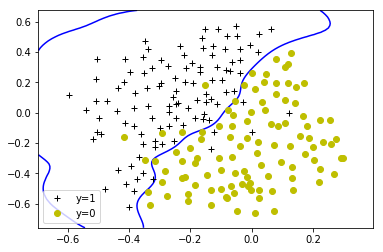

In [15]:
model=SVC(C=C,kernel='rbf',gamma=gamma).fit(X,y)
visualizeBoundary(X,y,model)
plt.show()